# Using rapidfuzz to extract affiliatuons from RES

First the JSON output file from tezseract is read in and made into a useable dataframe

In [1]:
#Importing the libraries
import json
import pandas as pd
from rapidfuzz import process
import requests

# Load input files from github
tesseract_input = requests.get('https://raw.githubusercontent.com/Matt970204/Affiliations_V2/main/1_Input%20files%20and%20processing%20input%20files/1_1_Input%20files/Tesseract%20affiliation%20output/RES/RES_aff_output_1940_2010.json')
json_data = tesseract_input.json()

# Import JSON file
#f = open('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Tesseract affiliation output/RES/RES_aff_output_1940_2010.json')
#json_data = json.load(f)

# Define Journal and Dataframe
Journal_Name = 'RES'
Reference_Data_List = []

# Extract Json Data into dataframe
for key1, value1 in json_data.items():
    Article_ID = key1
    content_type = value1["content_type"]
    author_list = value1["authors"]
    authorsNo = len(author_list)
    stable_url = value1["stable_url"]
    for key2 in value1["affiliations"]:
        Ref_type = key2
        if key2 == "found":
            ref_string = value1["affiliations"][key2]

    Reference_Data_List.append({'Journal_Name' : Journal_Name,
    'Authors_count' : authorsNo, 
    'Article_ID' : Article_ID, 'content_type' : content_type,
    'stable_url' : stable_url, 
    'Ref_type': Ref_type,  'ref_string':ref_string })

RES_aff_ref_output_1940_2010 = pd.DataFrame.from_records(Reference_Data_List)     
RES_aff_ref_output_1940_2010.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/Working files/RES_aff_ref_output_1940_2010.xlsx')        

Next the Unique list of universities is read in, this is used as a database to check the affiliton string against using rapidfuzz. 

In [2]:
# Load in the list of unique Universites from github stored in 2_fuzzy matching
#affs = pd.read_excel("https://raw.githubusercontent.com/Matt970204/Affiliations_V2/main/2_Extracting%20affilitations/2_Fuzzy%20matching/University%20list/Unique%20Universities.xlsx")


affs = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/University list/Unique Universities.xlsx')
print(affs.shape)

#testdata = RES_1940_2010.loc[0:20].reset_index(drop = True)
testdata = RES_aff_ref_output_1940_2010

for i in range(len(affs)):
    #Replaceing title case and stripping leading space
    affs.iat[i,0] = affs.iat[i,0].strip().title()
Affiliation_choices = affs['Affilliation'].values.tolist()

for i in range(len(testdata)):
    #Replaceing title case and stripping leading space
    testdata.iat[i,6] = testdata.iat[i,6].strip().title()


(849, 14)


In [3]:
#Reading in the master file and correctly formatting the article ID to match back onto the meltef file

#Load in master from Github
RES_master = pd.read_excel("https://raw.githubusercontent.com/Matt970204/Affiliations_V2/main/1_Input%20files%20and%20processing%20input%20files/1_1_Input%20files/Master%20lists/Processed/RES_processed.xlsx")

#Local store of AER_master
#RES_master = pd.read_excel('/Users/MattJohnson/Desktop/Affiliations/1_Input files and processing input files/1_1_Input files/Master lists/Processed/RES_processed.xlsx')

for i in range(len(RES_master)):
    RES_master.loc[i,['Article_ID']] = RES_master.loc[i,['stable_url']].to_string().rsplit('/',1)[-1]

RES_master_condenced  = RES_master[['Article_ID','year']]
RES_master_condenced['year'] = RES_master_condenced['year'].astype('int')
RES_master_condenced.head()

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_41710/2541882808.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RES_master_condenced['year'] = RES_master_condenced['year'].astype('int')


,Article_ID,year
0,26543955,2018
1,26543956,2018
2,26543957,2018
3,26543958,2018
4,26543959,2018


In [4]:
# MErging the msterfile onto the new melted file to get additional data
testdata_merged = testdata.merge(RES_master_condenced, how = 'left', on = 'Article_ID')
testdata_merged = testdata_merged.sort_values(by=['year'])
testdata = testdata_merged.reset_index(drop = True)

# Excel output to get an overview of the data
testdata.head
testdata.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/Test files/RES_aff_ref_output_1940_2010_affs_out initial data.xlsx') 

In [5]:
list(testdata.columns.values)
testdata = testdata[['Journal_Name',
 'Authors_count',
 'Article_ID',
 'content_type',
 'stable_url',
 'Ref_type',
 'ref_string',
  'year',]]
list(testdata.columns.values)

['Journal_Name',
 'Authors_count',
 'Article_ID',
 'content_type',
 'stable_url',
 'Ref_type',
 'ref_string',
 'year']

In [6]:
import re
split = testdata.iat[1,6].split('\n\n')
#print(split[-2])
split = testdata.iat[50,6].split('\n\n')

import re
#str = testdata.iat[18,6]
str1 = testdata.iloc[18]['ref_string']
base_string = re.split("This Content Downloaded | References| Appendix", str1)[0]
split = base_string.split('\n\n')
split.reverse()

#new_split = []
if split[0] == '':
    split.pop(0)
    print('true')

print(split[0:4])


true
['? Of Course There Is Another Solution Which Solves The Riddle In A Most Direct Way. The Solution\nIs To Convert That Portion Of The Total Surplus Value Which Is Not Consumed By The Capitalists Nor\nUsed For Replacement, Into Articles Which The State Finds Desirable And Which Are Capable Neither\nOf Glutting The Market, Nor Of Increasing The Amount Of Capital. Armaments May Be Considered\nThe Archetype Of This Form Of Commodity. The State May Acquire These Commodities Either By A\nDirect Requisition In The Form Of Taxation Or By Purchase Through Funds Obtained By Inducing The\nCapitalists To Convert Their Unconsumed Surplus-Value Into Money-Capital (Interest-Bearing\nCertificates Of Indebtedness Of The State). This Inducement May Be Facilitated By Obstructions To\nOr Prohibitions Of Conversion Of The Surplus Value Into Other Forms Of Capital. This Seems To Have\nBeen The Policy Of The Nazi State. The Essential Background Of The Solution Is A Transformation\nFrom A Dynamic Into A 

In [7]:
for i in range(3):
    print(testdata.iat[i,7])
    if (testdata.iloc[i]['year']) < 1970:
        print("true")

1940
true
1940
true
1940
true


In [8]:
for i in range(744,745):
    if (testdata.iloc[i]['year']) < 1971:
        import re
        str1 = testdata.iloc[i]['ref_string']
        base_string = re.split("Appendix|This Content Downloaded|References", str1)[0]
        split_base = base_string.split('\n\n')
        split_base.reverse()

        if split_base[0] == '':
            split_base.pop(0)

        split = []
        for i in split_base:
            if len(i) < 100:
                print('true')
                split.append(i)
            #else:
                #print('false')
        
        split_len = len(split)
        print(split_len)

#Testing 
        string = "\n\n".join(split)

    else:
        split_base = testdata.iloc[i]['ref_string'].split('\n\n')

        if split_base[0] == '':
            split_base.pop(0)

        split = []
        for i in split_base:
            if len(i) < 100:
                #print('true')
                split.append(i)
            #else:
                #print('false')
        
        split_len = len(split)
        print(split_len)
#Testing    
        string = "\n\n".join(split)

    print(string)
    #print(split_len)
    print(split)

2
J. H. Dreze
And

D. De La Vallee Poussin,
C.O.R.E.
['J. H. Dreze\nAnd', 'D. De La Vallee Poussin,\nC.O.R.E.']


Next the test data is split line by line and parsed through the fuzzy matching library rapid fuzz.  Using the process.extract function a list of variables from a data frame being the unique universities is checked to see if there is a match in the input line from tesseract.

In [9]:
# For loop to iterate through lines in the input data and check to see if this exists in the created data base. 
# If it exists it is appended to a dataframe as the next affiliton for that paper
import time as t
for i in range(len(testdata)):
#for i in range(807,812):

    if (testdata.iloc[i]['year']) < 1971:
        import re
        str1 = testdata.iloc[i]['ref_string']
        base_string = re.split("Appendix|This Content Downloaded|References", str1)[0]
        split_base = base_string.split('\n\n')
        split_base.reverse()

        if split_base[0] == '':
            split_base.pop(0)

        split = []
        for z in split_base:
            if len(z) < 100:
                #print('true')
                split.append(z)
            #else:
                #print('false')
        
        split_len = len(split)
        #print(split_len)

    else:
        split_base = testdata.iloc[i]['ref_string'].split('\n\n')

        if split_base[0] == '':
            split_base.pop(0)

        split = []
        for z in split_base:
            if len(z) < 100:
                #print('true')
                split.append(z)
            #else:
                #print('false')
        
        
        split_len = len(split)
        #print(split_len)
#Testing    
    string = "\n\n".join(split)
        #print('false',i)
    
    #print(string)

    print(split)
   # print(split_len)


    affiliations = []
    count_no_aff = 0
    #print(split_len)
    for j in range(split_len):
        #print(i)
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) > 0:
            affiliations = affiliations + process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)
            
        if len(process.extract(split[j],Affiliation_choices, limit= 10, score_cutoff= 90)) == 0:
            count_no_aff = count_no_aff+1

        if count_no_aff == 8:
            break
        if j == split_len:
            break
    
    print(affiliations)
    print("Length = " , len(affiliations), ", Number = ",i)
    
    #Testing
    #print(string)
    #t.sleep(4)

    testdata.loc[i,['string']] = string
    #print("STRING!!!")
    #print(testdata.loc[i,['string']])
    #t.sleep(4)

    if len(affiliations) == 0:
        testdata.loc[i,['Missing aff']] = "Missing"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 1:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 2:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 3:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 4:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 5:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
        print(affiliations)
    elif len(affiliations) == 6:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff6_Picked_Up']] = Affiliation_choices[affiliations[5][2]]
        testdata.loc[i,['aff6_Score']] = affiliations[5][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 7:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff6_Picked_Up']] = Affiliation_choices[affiliations[5][2]]
        testdata.loc[i,['aff6_Score']] = affiliations[5][1]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff7_Picked_Up']] = Affiliation_choices[affiliations[6][2]]
        testdata.loc[i,['aff7_Score']] = affiliations[6][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 8:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff6_Picked_Up']] = Affiliation_choices[affiliations[5][2]]
        testdata.loc[i,['aff6_Score']] = affiliations[5][1]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff7_Picked_Up']] = Affiliation_choices[affiliations[6][2]]
        testdata.loc[i,['aff7_Score']] = affiliations[6][1]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff8_Picked_Up']] = Affiliation_choices[affiliations[7][2]]
        testdata.loc[i,['aff8_Score']] = affiliations[7][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 9:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff6_Picked_Up']] = Affiliation_choices[affiliations[5][2]]
        testdata.loc[i,['aff6_Score']] = affiliations[5][1]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff7_Picked_Up']] = Affiliation_choices[affiliations[6][2]]
        testdata.loc[i,['aff7_Score']] = affiliations[6][1]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff8_Picked_Up']] = Affiliation_choices[affiliations[7][2]]
        testdata.loc[i,['aff8_Score']] = affiliations[7][1]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff9_Picked_Up']] = Affiliation_choices[affiliations[8][2]]
        testdata.loc[i,['aff9_Score']] = affiliations[8][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 10:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff6_Picked_Up']] = Affiliation_choices[affiliations[5][2]]
        testdata.loc[i,['aff6_Score']] = affiliations[5][1]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff7_Picked_Up']] = Affiliation_choices[affiliations[6][2]]
        testdata.loc[i,['aff7_Score']] = affiliations[6][1]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff8_Picked_Up']] = Affiliation_choices[affiliations[7][2]]
        testdata.loc[i,['aff8_Score']] = affiliations[7][1]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff9_Picked_Up']] = Affiliation_choices[affiliations[8][2]]
        testdata.loc[i,['aff9_Score']] = affiliations[8][1]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff10_Picked_Up']] = Affiliation_choices[affiliations[9][2]]
        testdata.loc[i,['aff10_Score']] = affiliations[9][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 11:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff6_Picked_Up']] = Affiliation_choices[affiliations[5][2]]
        testdata.loc[i,['aff6_Score']] = affiliations[5][1]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff7_Picked_Up']] = Affiliation_choices[affiliations[6][2]]
        testdata.loc[i,['aff7_Score']] = affiliations[6][1]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff8_Picked_Up']] = Affiliation_choices[affiliations[7][2]]
        testdata.loc[i,['aff8_Score']] = affiliations[7][1]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff9_Picked_Up']] = Affiliation_choices[affiliations[8][2]]
        testdata.loc[i,['aff9_Score']] = affiliations[8][1]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff10_Picked_Up']] = Affiliation_choices[affiliations[9][2]]
        testdata.loc[i,['aff10_Score']] = affiliations[9][1]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['aff11_Picked_Up']] = Affiliation_choices[affiliations[10][2]]
        testdata.loc[i,['aff11_Score']] = affiliations[10][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    elif len(affiliations) == 12:
        testdata.loc[i,['aff1']] = affiliations[0][0]
        testdata.loc[i,['aff1_Picked_Up']] = Affiliation_choices[affiliations[0][2]]
        testdata.loc[i,['aff1_Score']] = affiliations[0][1]
        testdata.loc[i,['aff2']] = affiliations[1][0]
        testdata.loc[i,['aff2_Picked_Up']] = Affiliation_choices[affiliations[1][2]]
        testdata.loc[i,['aff2_Score']] = affiliations[1][1]
        testdata.loc[i,['aff3']] = affiliations[2][0]
        testdata.loc[i,['aff3_Picked_Up']] = Affiliation_choices[affiliations[2][2]]
        testdata.loc[i,['aff3_Score']] = affiliations[2][1]
        testdata.loc[i,['aff4']] = affiliations[3][0]
        testdata.loc[i,['aff4_Picked_Up']] = Affiliation_choices[affiliations[3][2]]
        testdata.loc[i,['aff4_Score']] = affiliations[3][1]
        testdata.loc[i,['aff5']] = affiliations[4][0]
        testdata.loc[i,['aff5_Picked_Up']] = Affiliation_choices[affiliations[4][2]]
        testdata.loc[i,['aff5_Score']] = affiliations[4][1]
        testdata.loc[i,['aff6']] = affiliations[5][0]
        testdata.loc[i,['aff6_Picked_Up']] = Affiliation_choices[affiliations[5][2]]
        testdata.loc[i,['aff6_Score']] = affiliations[5][1]
        testdata.loc[i,['aff7']] = affiliations[6][0]
        testdata.loc[i,['aff7_Picked_Up']] = Affiliation_choices[affiliations[6][2]]
        testdata.loc[i,['aff7_Score']] = affiliations[6][1]
        testdata.loc[i,['aff8']] = affiliations[7][0]
        testdata.loc[i,['aff8_Picked_Up']] = Affiliation_choices[affiliations[7][2]]
        testdata.loc[i,['aff8_Score']] = affiliations[7][1]
        testdata.loc[i,['aff9']] = affiliations[8][0]
        testdata.loc[i,['aff9_Picked_Up']] = Affiliation_choices[affiliations[8][2]]
        testdata.loc[i,['aff9_Score']] = affiliations[8][1]
        testdata.loc[i,['aff10']] = affiliations[9][0]
        testdata.loc[i,['aff10_Picked_Up']] = Affiliation_choices[affiliations[9][2]]
        testdata.loc[i,['aff10_Score']] = affiliations[9][1]
        testdata.loc[i,['aff11']] = affiliations[10][0]
        testdata.loc[i,['aff11_Picked_Up']] = Affiliation_choices[affiliations[10][2]]
        testdata.loc[i,['aff11_Score']] = affiliations[10][1]
        testdata.loc[i,['aff12']] = affiliations[11][0]
        testdata.loc[i,['aff12_Picked_Up']] = Affiliation_choices[affiliations[11][2]]
        testdata.loc[i,['aff12_Score']] = affiliations[11][1]
        testdata.loc[i,['Missing aff']] = "Contains"
        testdata.loc[i,['No of Affs']] = len(affiliations)
    else: 
        testdata.loc[i,['Missing aff']] = "More than 12"

    #print(testdata.loc[i,['string']])

['Chicago. Oscar Lange.', 'Complementarity And Interrelations Of Shifts 603']
[]
Length =  0 , Number =  0
['Economics By Motion Symbols I9']
[]
Length =  0 , Number =  1
['Manchester. L. Rosras.', 'Capital Levies In Central Europe, R91I9-1924 3I']
[]
Length =  0 , Number =  2
['Dundee. Mantan Bowley.', 'Local Rates And Housing Subsidies 43\nV']
[]
Length =  0 , Number =  3
['London. G. L. S. Shacele.', '48 The Review Of Economic Studies']
[]
Length =  0 , Number =  4
['Ames, Iowa, U.S.A. Albert Gailord Hart.', 'Uncertainty And Inducement To Invest 53']
[]
Length =  0 , Number =  5
['G. L. S. Shackle.\nLondon.', 'A Reply To Professor Hart 57']
[]
Length =  0 , Number =  6
['Manchester. J. R. Hicgs.', 'A Comment 65']
[]
Length =  0 , Number =  7
['P. Sargant Florence.', 'Birmingham. A. J. Wensrey.', '158 The Review Of Economic Studies']
[]
Length =  0 , Number =  8
['1 Capital And Employment, P. 42.', 'London. Tow Wirsow.', 'Capital Theory And The Trade Cycle 179']
[]
Length =  0 , Numb

In [10]:
list(testdata.columns.values)
testdata = testdata[['Journal_Name',
 'Authors_count',
 'year',
 'Article_ID',
 'content_type',
 'stable_url',
 'Ref_type',
 'ref_string',
 'Missing aff',
 'No of Affs',
 'string',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'aff5',
 'aff6',
 'aff7',
 'aff8',
 'aff1_Picked_Up',
 'aff1_Score',
 'aff2_Picked_Up',
 'aff2_Score',
 'aff3_Picked_Up',
 'aff3_Score',
 'aff4_Picked_Up',
 'aff4_Score',
 'aff5_Picked_Up',
 'aff5_Score',
 'aff6_Picked_Up',
 'aff6_Score',
 'aff7_Picked_Up',
 'aff7_Score',
 'aff8_Picked_Up',
 'aff8_Score']]
list(testdata.columns.values)

['Journal_Name',
 'Authors_count',
 'year',
 'Article_ID',
 'content_type',
 'stable_url',
 'Ref_type',
 'ref_string',
 'Missing aff',
 'No of Affs',
 'string',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'aff5',
 'aff6',
 'aff7',
 'aff8',
 'aff1_Picked_Up',
 'aff1_Score',
 'aff2_Picked_Up',
 'aff2_Score',
 'aff3_Picked_Up',
 'aff3_Score',
 'aff4_Picked_Up',
 'aff4_Score',
 'aff5_Picked_Up',
 'aff5_Score',
 'aff6_Picked_Up',
 'aff6_Score',
 'aff7_Picked_Up',
 'aff7_Score',
 'aff8_Picked_Up',
 'aff8_Score']

In [11]:
# Second check for matching of string, another layer of matching to 95% confidence to delete all wrong entries

from rapidfuzz import fuzz
import numpy as np

testdata = testdata.replace(np.nan, '', regex=True)
for i in range(len(testdata)):
#for i in range(67,69):

    for j in range(1,9):
        if testdata.iloc[i]['aff'+str(j)]!= '':
            input = testdata.iloc[i]['aff'+str(j)]

            test = testdata.iloc[i]['string']
            print(input)
            print(test)
            ratio  = fuzz.partial_ratio(test, input)
            #print(ratio)

            if ratio > 95:
                testdata.loc[i,'aff'+str(j)+'_Score'] = ratio
            else:
                testdata.loc[i,'aff'+str(j)] = ''
                testdata.loc[i,'aff'+str(j)+'_Score'] = ''
                testdata.loc[i,'aff'+str(j)+'_Picked_Up'] = ''

            print(testdata.iloc[i]['aff'+str(j)])
            print(testdata.iloc[i]['aff'+str(j)+'_Score'])
            print(testdata.iloc[i]['aff'+str(j)+'_Picked_Up'])


Cambridge
Cambridge. M. Kalecri.
Statistical 

Iio The Review Of Economic Studies
Cambridge
100.0
Cambridge
Cambridge
Cambridge, Mass. S. S. Alexander.

Conclusion

Mr. Keynes And Mr. Marx 135
Cambridge
100.0
Cambridge
Cambridge
Cambridge. C. E. V. Leser.

Table 7
Main Results, New York City, 1935-36.

56 The Review Of Economic Studies
Cambridge
100.0
Cambridge
Cambridge
Cambridge. Trbor Baarna.

Wherec — Y.£(Y)Anddc — [Ro T Xem Dy, €.) Beingthe Capitalincomerelation Sought.

&(Y) .$(Y)Ay — 9(C)Ac

Note C. Synchronisation Of Distributions Of Income And Capital.

The Burden Of Death Duties 39
Cambridge
100.0
Cambridge
Cambridge
Cambridge. C. E. V. Leser.

Table 7
Main Results, New York City, 1935-36.

56 The Review Of Economic Studies
Cambridge
100.0
Cambridge
Cambridge
Cambridge. C. E. V. Leser.

Table 7
Main Results, New York City, 1935-36.

56 The Review Of Economic Studies
Cambridge
100.0
Cambridge
Cambridge
Cambridge. C. E. V. Leser.

Table 7
Main Results, New York City, 1935-36.



In [12]:
from rapidfuzz import fuzz
input = "California Institute Of Technglogy"
input = "Vanderbilt University"
test = "Charles R. Plott California Institute Of Technology And James T. Little And Robert P. Parks Washington University"
fuzz.partial_ratio(test, input)

72.72727272727273

In [13]:
# Excel output to get an overview of the data
testdata.head
testdata.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/Test files/RES_aff_ref_output_1940_2010_affs_out testing.xlsx') 

In [14]:
print(testdata.columns.get_loc("aff1"))
print(testdata.columns.get_loc("aff8"))

start = testdata.columns.get_loc("aff1")
end = testdata.columns.get_loc("aff8")
for j in range(start, end+1):
    print(j)

11
18
11
12
13
14
15
16
17
18


In [15]:
import numpy as np
testdata = testdata.replace(np.nan, '', regex=True)
for i in range(len(testdata)):
    start = testdata.columns.get_loc("aff1")
    end = testdata.columns.get_loc("aff8")  

    for j in range(start,end+1):
    #Replaceing title case and stripping leading space
        testdata.iat[i,j] = testdata.iat[i,j].strip().title()
        testdata.iat[i,j] = testdata.iat[i,j].rstrip(',')

# Columbia
# Columbia University
        if testdata.iat[i,j] == 'Columbia':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Columbia", "Columbia University")

        if testdata.iat[i,j] == 'Columbia Business School':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Columbia Business School", "Columbia University")

        if testdata.iat[i,j] == 'Columbia Graduate School Of Business':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Columbia Graduate School Of Business", "Columbia University")
    
# Harvard
#Harvard University
        if testdata.iat[i,j] == 'Harvard':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard", "Harvard University")

        if testdata.iat[i,j] == 'Harvard Business School':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard Business School", "Harvard University")

        if testdata.iat[i,j] == 'Harvard Graduate School of Design':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard Graduate School of Design", "Harvard University")

        if testdata.iat[i,j] == 'Harvard Law School':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard Law School", "Harvard University")

        if testdata.iat[i,j] == 'Harvard Divinity School':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard Divinity School", "Harvard University")

        if testdata.iat[i,j] == 'Harvard Medical School':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard Medical School", "Harvard University")

        if testdata.iat[i,j] == 'John F. Kennedy School of Government':
            testdata.iat[i,j] = testdata.iat[i,j].replace("John F. Kennedy School of Government", "Harvard University")

        if testdata.iat[i,j] == 'Harvard T.H. Chan School of Public Health':
            testdata.iat[i,j] = testdata.iat[i,j].replace('Harvard T.H. Chan School of Public Health', "Harvard University")

        if testdata.iat[i,j] == 'Harvard John A. Paulson School of Engineering and Applied Sciences':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard John A. Paulson School of Engineering and Applied Sciences", "Harvard University")

        if testdata.iat[i,j] == 'Harvard Kenneth C. Griffin Graduate School of Arts and Sciences':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard Kenneth C. Griffin Graduate School of Arts and Sciences", "Harvard University")

        if testdata.iat[i,j] == 'Harvard Division of Continuing Education':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harvard Division of Continuing Education", "Harvard University")



# Oxford
# Base Oxford spelling
# University Of Oxford
        if testdata.iat[i,j] == 'Oxford':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Oxford", "University Of Oxford")

        if testdata.iat[i,j] == 'Oxford University':
            testdata.iat[i,j] = testdata.iat[i,j].replace('Oxford University', "University Of Oxford")

        if testdata.iat[i,j] == 'Christ Church':
            testdata.iat[i,j] = testdata.iat[i,j].replace('Christ Church', "University Of Oxford")

        if testdata.iat[i,j] == 'Nuffield College, Oxford':
            testdata.iat[i,j] = testdata.iat[i,j].replace('Nuffield College', "University Of Oxford")

        if testdata.iat[i,j] == 'Trinity College, Oxford':
            testdata.iat[i,j] = testdata.iat[i,j].replace('Trinity College', "University Of Oxford")   
        
        if testdata.iat[i,j] == 'All Souls College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("All Souls College", "University Of Oxford")   

        if testdata.iat[i,j] == 'Balliol College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Balliol College", "University Of Oxford")

        if testdata.iat[i,j] == 'Brasenose College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Brasenose College", "University Of Oxford")

        if testdata.iat[i,j] == 'Corpus Christi College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Corpus Christi College", "University Of Oxford")

        if testdata.iat[i,j] == 'Exeter College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Exeter College", "University Of Oxford")

        if testdata.iat[i,j] == 'Green Templeton College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Green Templeton College", "University Of Oxford")

        if testdata.iat[i,j] == 'Harris Manchester College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Harris Manchester College", "University Of Oxford")

        if testdata.iat[i,j] == 'Hertford College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Hertford College", "University Of Oxford")

        if testdata.iat[i,j] == 'Jesus College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Jesus College", "University Of Oxford")

        if testdata.iat[i,j] == 'Keble College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Keble College", "University Of Oxford")

        if testdata.iat[i,j] == 'Kellogg College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Kellogg College", "University Of Oxford")

        if testdata.iat[i,j] == 'Lady Margaret Hall':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Lady Margaret Hall", "University Of Oxford")

        if testdata.iat[i,j] == 'Linacre College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Linacre College", "University Of Oxford")

        if testdata.iat[i,j] == 'Lincoln College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Lincoln College", "University Of Oxford")

        if testdata.iat[i,j] == 'Magdalen College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Magdalen College", "University Of Oxford")

        if testdata.iat[i,j] == 'Mansfield College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Mansfield College", "University Of Oxford")

        if testdata.iat[i,j] == 'Merton College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Merton College", "University Of Oxford")

        if testdata.iat[i,j] == 'New College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("New College", "University Of Oxford")

        if testdata.iat[i,j] == 'Oriel College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Oriel College", "University Of Oxford")

        if testdata.iat[i,j] == 'Pembroke College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Pembroke College", "University Of Oxford")

        if testdata.iat[i,j] == 'Reuben College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Reuben College", "University Of Oxford")

        if testdata.iat[i,j] == 'Somerville College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Somerville College", "University Of Oxford")

        if testdata.iat[i,j] == "St Anne's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Anne's College", "University Of Oxford")

        if testdata.iat[i,j] == "St Antony's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Antony's College", "University Of Oxford")

        if testdata.iat[i,j] == "St Catherine's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Catherine's College", "University Of Oxford")

        if testdata.iat[i,j] == 'St Cross College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Cross College", "University Of Oxford")

        if testdata.iat[i,j] == 'St Edmund Hall':
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Edmund Hall", "University Of Oxford")

        if testdata.iat[i,j] == "St Hilda's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Hilda's College", "University Of Oxford")

        if testdata.iat[i,j] == "St Hugh's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Hugh's College", "University Of Oxford")

        if testdata.iat[i,j] == "St John's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St John's College", "University Of Oxford")

        if testdata.iat[i,j] == "St Peter's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Peter's College", "University Of Oxford")  

        if testdata.iat[i,j] == "The Queen's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("The Queen's College", "University Of Oxford")  

        if testdata.iat[i,j] == 'University College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("University College", "University Of Oxford")  

        if testdata.iat[i,j] == 'Wadham College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Wadham College", "University Of Oxford")  

        if testdata.iat[i,j] == 'Wolfson College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Wolfson College", "University Of Oxford")  

        if testdata.iat[i,j] == 'Worcester College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Worcester College", "University Of Oxford")  

# Yale
# Base Yale spelling
# Yale University
        if testdata.iat[i,j] == 'Yale':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Yale", "Yale University")

        if testdata.iat[i,j] == 'Berkeley College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Berkeley College", "Yale University")

        if testdata.iat[i,j] == 'Branford College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Branford College", "Yale University")

        if testdata.iat[i,j] == 'Davenport College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Davenport College", "Yale University")

        if testdata.iat[i,j] == 'Ezra Stiles College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Ezra Stiles College", "Yale University")

        if testdata.iat[i,j] == 'Jonathan Edwards College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Jonathan Edwards College", "Yale University")

        if testdata.iat[i,j] == 'Benjamin Franklin College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Benjamin Franklin College", "Yale University")

        if testdata.iat[i,j] == 'Grace Hopper College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Grace Hopper College", "Yale University")

        if testdata.iat[i,j] == 'Morse College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Morse College", "Yale University")

        if testdata.iat[i,j] == 'Pauli Murray College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Pauli Murray College", "Yale University")

        if testdata.iat[i,j] == 'Pierson College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Pierson College", "Yale University")

        if testdata.iat[i,j] == 'Saybrook College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Saybrook College", "Yale University")

        if testdata.iat[i,j] == 'Silliman College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Silliman College", "Yale University")

        if testdata.iat[i,j] == 'Timothy Dwight College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Timothy Dwight College", "Yale University")

        if testdata.iat[i,j] == 'Trumbull College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Trumbull College", "Yale University")

# Cambridge
# Base Cambridge spelling
# University of Cambridge
        if testdata.iat[i,j] == 'Cambridge':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Cambridge", "University of Cambridge")

        if testdata.iat[i,j] == "Christ's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("Christ's College", "University of Cambridge")

        if testdata.iat[i,j] == 'Churchill College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Churchill College", "University of Cambridge")

        if testdata.iat[i,j] == 'Clare College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Clare College", "University of Cambridge")

        if testdata.iat[i,j] == 'Clare Hall':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Clare Hall", "University of Cambridge")

        if testdata.iat[i,j] == 'Corpus Christi College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Corpus Christi College", "University of Cambridge")

        if testdata.iat[i,j] == 'Darwin College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Darwin College", "University of Cambridge")

        if testdata.iat[i,j] == 'Downing College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Downing College", "University of Cambridge")

        if testdata.iat[i,j] == 'Emmanuel College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Emmanuel College", "University of Cambridge")

        if testdata.iat[i,j] == 'Fitzwilliam College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Fitzwilliam College", "University of Cambridge")

        if testdata.iat[i,j] == 'Girton College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Girton College", "University of Cambridge")

        if testdata.iat[i,j] == 'Gonville & Caius College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Gonville & Caius College", "University of Cambridge")

        if testdata.iat[i,j] == 'Homerton College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Homerton College", "University of Cambridge")

        if testdata.iat[i,j] == 'Jesus College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Jesus College", "University of Cambridge")

        if testdata.iat[i,j] == "King's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("King's College", "University of Cambridge")

        if testdata.iat[i,j] == 'Lucy Cavendish College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Lucy Cavendish College", "University of Cambridge")

        if testdata.iat[i,j] == 'Magdalene College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Magdalene College", "University of Cambridge")

        if testdata.iat[i,j] == 'Murray Edwards College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Murray Edwards College", "University of Cambridge")

        if testdata.iat[i,j] == 'Newnham College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Newnham College", "University of Cambridge")

        if testdata.iat[i,j] == 'Pembroke College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Pembroke College", "University of Cambridge")

        if testdata.iat[i,j] == 'Peterhouse':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Peterhouse", "University of Cambridge")
        
        if testdata.iat[i,j] == "Queens' College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("Queens' College", "University of Cambridge")

        if testdata.iat[i,j] == 'Robinson College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Robinson College", "University of Cambridge")

        if testdata.iat[i,j] == 'Selwyn College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Selwyn College", "University of Cambridge")

        if testdata.iat[i,j] == 'Sidney Sussex College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Sidney Sussex College", "University of Cambridge")

        if testdata.iat[i,j] == "St Catharine's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Catharine's College", "University of Cambridge")

        if testdata.iat[i,j] == "St Edmund's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Edmund's College", "University of Cambridge")

        if testdata.iat[i,j] == 'Trinity College':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Trinity College", "University of Cambridge")

        if testdata.iat[i,j] == "St John's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St John's College", "University of Cambridge")

        if testdata.iat[i,j] == "Trinity Hall":
            testdata.iat[i,j] = testdata.iat[i,j].replace("Trinity Hall", "University of Cambridge")

        if testdata.iat[i,j] == "St Edmund's College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("St Edmund's College", "University of Cambridge")

        if testdata.iat[i,j] == "Wolfson College":
            testdata.iat[i,j] = testdata.iat[i,j].replace("Wolfson College", "University of Cambridge")

# Texas A&M University
        if testdata.iat[i,j] == 'Texas A And M University':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Texas A And M University", "Texas A&M University")

        if testdata.iat[i,j] == 'Texas A & M University':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Texas A & M University", "Texas A&M University")

        if testdata.iat[i,j] == 'Texas A. And M. University':
            testdata.iat[i,j] = testdata.iat[i,j].replace("Texas A. And M. University", "Texas A&M University")


    

In [16]:
# Removing duplicate entries of the same university

import numpy as np
testdata = testdata.replace(np.nan, '', regex=True)

#Range for affiliations in JPE
for i in range(len(testdata)):
    for j in range(start,end+1):
    #If 1 = 2, or 2 = 3
        if testdata.iat[i,j] == testdata.iat[i,j+1]:
            testdata.iat[i,j+1] = np.nan

    #If 1 = 3, 2 = 4, 3 = 5
    for j in range(start,end+1):
    #Replaceing title case and stripping leading space
        if testdata.iat[i,j] == testdata.iat[i,j+2]:
            testdata.iat[i,j+2] = np.nan

    #If 1 = 4, 2 = 5, 3 = 6
    for j in range(start,end):
    #Replaceing title case and stripping leading space
        if testdata.iat[i,j] == testdata.iat[i,j+3]:
            testdata.iat[i,j+3] = np.nan

testdata = testdata.replace('', np.nan, regex=True)

In [17]:
list(testdata.columns.values)
testdata_manipulated = testdata[['Journal_Name',
 'Authors_count',
 'year',
 'Article_ID',
 'content_type',
 'stable_url',
 'Ref_type',
 'ref_string',
 'string',
 'Missing aff',
 'No of Affs',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'aff5',
 'aff6',
 'aff7',
 'aff8',
  'aff1',
  'aff1_Picked_Up',
 'aff1_Score',
  'aff2',
 'aff2_Picked_Up',
 'aff2_Score',
  'aff3',
 'aff3_Picked_Up',
 'aff3_Score',
  'aff4',
 'aff4_Picked_Up',
 'aff4_Score',
  'aff5',
 'aff5_Picked_Up',
 'aff5_Score',
  'aff6',
 'aff6_Picked_Up',
 'aff6_Score',
  'aff7',
 'aff7_Picked_Up',
 'aff7_Score',
  'aff8',
 'aff8_Picked_Up',
 'aff8_Score']]
list(testdata_manipulated.columns.values)

['Journal_Name',
 'Authors_count',
 'year',
 'Article_ID',
 'content_type',
 'stable_url',
 'Ref_type',
 'ref_string',
 'string',
 'Missing aff',
 'No of Affs',
 'aff1',
 'aff2',
 'aff3',
 'aff4',
 'aff5',
 'aff6',
 'aff7',
 'aff8',
 'aff1',
 'aff1_Picked_Up',
 'aff1_Score',
 'aff2',
 'aff2_Picked_Up',
 'aff2_Score',
 'aff3',
 'aff3_Picked_Up',
 'aff3_Score',
 'aff4',
 'aff4_Picked_Up',
 'aff4_Score',
 'aff5',
 'aff5_Picked_Up',
 'aff5_Score',
 'aff6',
 'aff6_Picked_Up',
 'aff6_Score',
 'aff7',
 'aff7_Picked_Up',
 'aff7_Score',
 'aff8',
 'aff8_Picked_Up',
 'aff8_Score']

In [18]:
# Excel output to get an overview of the data
testdata_manipulated.head
testdata_manipulated.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/Test files/RES_aff_ref_output_1940_2010_affs_out.xlsx') 

In [19]:
# This is taking a dataframe with multiple affilitaion columns and melting these to be all one column.
melted = testdata_manipulated.melt(id_vars= ['Article_ID','year'], value_vars=['aff1','aff2','aff3','aff4','aff5','aff6','aff7','aff8']).dropna()
melted.rename(columns = {'variable':'Aff number'}, inplace = True)
melted.rename(columns = {'value':'Affiliation'}, inplace = True)
print(melted.head())

   Article_ID  year Aff number              Affiliation
16    2967473  1940       aff1  University of Cambridge
18    2967475  1940       aff1  University of Cambridge
21    2967638  1941       aff1  University of Cambridge
22    2967636  1941       aff1  University of Cambridge
23    2967637  1941       aff1  University of Cambridge


In [20]:
# MErging the msterfile onto the new melted file to get additional data
#RES_melted_master = melted.merge(RES_master_condenced, how = 'left', on = 'Article_ID')
RES_melted_master = melted.sort_values(by=['year'])
RES_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/RES_melted_master.xlsx') 
RES_melted_master.head()

,Article_ID,year,Aff number,Affiliation
16,2967473,1940,aff1,University of Cambridge
18,2967475,1940,aff1,University of Cambridge
2132,2967473,1940,aff1,University of Cambridge
2134,2967475,1940,aff1,University of Cambridge
21,2967638,1941,aff1,University of Cambridge


In [21]:
# Counting the number of times a certain affiliton occurs
RES_melted_master['aff_cum_counts'] = RES_melted_master.groupby(['Affiliation']).cumcount()+1
RES_melted_master.head()
RES_melted_master.to_excel('/Users/MattJohnson/Desktop/Affiliations/2_Extracting affilitations/2_Fuzzy matching/RES/Test files/RES_melted_master_aff_count.xlsx') 

In [22]:
# Storing the master file to transer between notebooks
%store RES_melted_master

Stored 'RES_melted_master' (DataFrame)


In [23]:
# Checking the top 20 occurances of Universities over the 70 years
highest_vals = RES_melted_master.drop_duplicates(subset = ['Affiliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(20,'aff_cum_counts')
highest_vals_10

highest_vals_10 = highest_vals_10[['Article_ID',
 'Aff number',
 'Affiliation',
 'year',
 'aff_cum_counts']]

highest_vals_10

,Article_ID,Aff number,Affiliation,year,aff_cum_counts
6324,40836646,aff2,University of Cambridge,2010,286
4213,40836651,aff1,University Of Oxford,2010,266
4155,20185091,aff1,Northwestern University,2009,152
25383,40835853,aff6,London School Of Economics,2010,152
4228,40835858,aff1,Harvard University,2010,152
4218,40836656,aff1,Princeton University,2010,116
25389,40835859,aff6,University Of Pennsylvania,2010,114
4201,40587628,aff1,Stanford University,2010,110
4153,40247625,aff1,University Of Chicago,2009,94
12658,40587621,aff3,York University,2010,84


     Article_ID  year Aff number              Affiliation  aff_cum_counts
16      2967473  1940       aff1  University of Cambridge               1
18      2967475  1940       aff1  University of Cambridge               2
2132    2967473  1940       aff1  University of Cambridge               3
2134    2967475  1940       aff1  University of Cambridge               4
21      2967638  1941       aff1  University of Cambridge               5


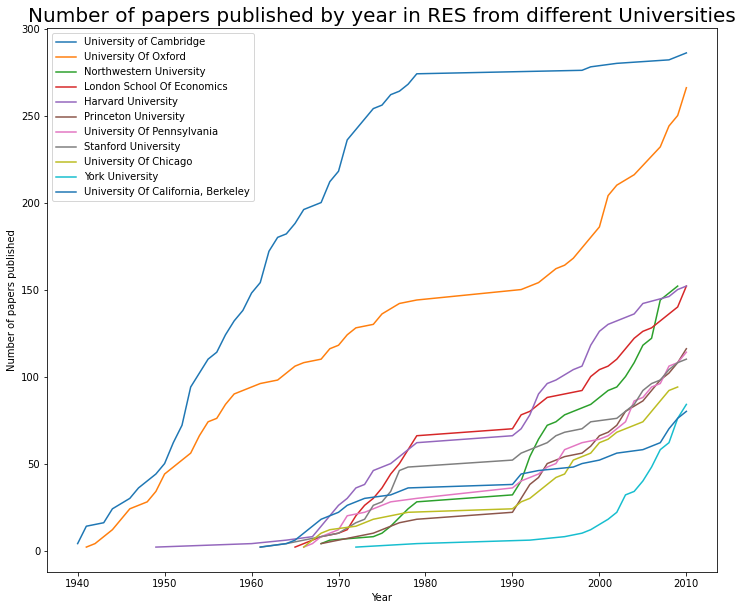

In [24]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Combined_cumcount = RES_melted_master
print(Combined_cumcount.head())

a = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[0,2])].drop_duplicates(subset = ['year'], keep = 'last')
b = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[1,2])].drop_duplicates(subset = ['year'], keep = 'last')
c = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[2,2])].drop_duplicates(subset = ['year'], keep = 'last')
d = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[3,2])].drop_duplicates(subset = ['year'], keep = 'last')
e = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[4,2])].drop_duplicates(subset = ['year'], keep = 'last')
f = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[5,2])].drop_duplicates(subset = ['year'], keep = 'last')
g = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[6,2])].drop_duplicates(subset = ['year'], keep = 'last')
h = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[7,2])].drop_duplicates(subset = ['year'], keep = 'last')
i = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[8,2])].drop_duplicates(subset = ['year'], keep = 'last')
j = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[9,2])].drop_duplicates(subset = ['year'], keep = 'last')
k = Combined_cumcount.loc[(Combined_cumcount['Affiliation'] == highest_vals_10.iat[10,2])].drop_duplicates(subset = ['year'], keep = 'last')


plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,2])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,2])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,2])
plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,2])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,2])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,2])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,2])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,2])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,2])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,2])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,2])

plt.title('Number of papers published by year in RES from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()